# Exercise 5

The purpose of this exercise is understand and define the neural network architectures and activation function for different kind of prediction or classification problem.

In each NN you have to define:
1. Input layer: Number of nodes and activation function
2. Hidden layers: Activation function 
3. Output layer: Number of nodes  and activation function

You don't need to download and train your NN, just contruct and compile NN.

## Regression 

Used dataset is [Boston House pricing](https://www.kaggle.com/vikrishnan/boston-house-prices)

Dataset Description from the Kaggle:
Content

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. LSTAT:  lower status of the population
14. MEDV: Median value of owner-occupied homes in dollars 1000s

In [1]:
# Mika!
# Please note that due to ethical concerns this dataset is only encouraged to be used to study and educate about ethical issues
# see warning with eplanation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [2]:
import tensorflow as tf
import pandas as pd 
tf.keras.backend.set_floatx('float64')

from tensorflow.keras import layers
from tensorflow import keras


In [3]:
# Define NN using Keras Functional API
# Input layer with suitable amount of nodes
# 1. hidden layer: 13
# Output layer: number of nodes, activation function and loss
# Implementation comes to this cell

inputs = layers.Input(shape = (13,)) # with the presumption that no dummies etc. coding were needed for the features. To get the shape of the training data, I would just use (Xtrain.shape[1], ).
hidden = layers.Dense(13, activation = 'relu')(inputs)
outputs = layers.Dense(1, activation = 'linear')(hidden)

model = keras.Model(inputs = inputs, outputs = outputs, name = 'regression_model')

# Compile model with following options: 
# Define loss function and use adam optimization algorithm 

model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.01))

model.summary()

Model: "regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


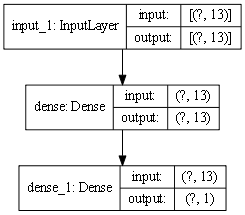

In [4]:
tf.keras.utils.plot_model(model,dpi=70,show_shapes=True)

## Binary Classification

__Short description of dataset:__ [Sonar dataset](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.

In [5]:
# Define NN using Keras Functional API
# Input layer with suitable amount of nodes
# 1. hidden layer: 30
# Output layer: number of nodes, activation function and loss
# Implementation comes to this cell

inputs = layers.Input(shape = (60,)) # with the presumption that no dummies etc. coding were needed for the features
hidden = layers.Dense(30, activation = 'relu')(inputs)
outputs = layers.Dense(1, activation = 'sigmoid')(hidden)

model = keras.Model(inputs = inputs, outputs = outputs, name = 'binary_classification_model')

# Compile model with following options: 
# Define loss function and use adam optimization algorithm 

model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.01))

model.summary()

Model: "binary_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


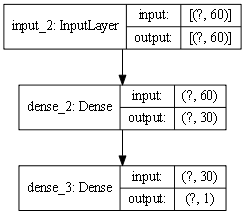

In [6]:
tf.keras.utils.plot_model(model,dpi=70,show_shapes=True)

## Multiclass Classification

[Wines dataset](https://archive.ics.uci.edu/ml/datasets/Wine%2BQuality) which contains 12 attributes, 11 wine features and 1 rate (1-10) at the end.

Features:
- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulfates
- Alcohol

Quality (1-10) is an class as follows
1-3: Bad
4-6: Good
7-10: Excellend


In [7]:
# Define NN using Keras Functional API
# Input layer with suitable amount of nodes
# 1. hidden layer: 30
# 2. hidden layer: 40
# 3. hidden layer: 20
# Output layer: number of nodes, activation function and loss


inputs = layers.Input(shape = (11,)) # with the presumption that no dummies etc. coding were needed for the features
hidden1 = layers.Dense(30, activation = 'relu')(inputs)
hidden2 = layers.Dense(40, activation = 'relu')(hidden1)
hidden3 = layers.Dense(20, activation = 'relu')(hidden2)
outputs = layers.Dense(1, activation = 'softmax')(hidden3) # one node per quality class

model = keras.Model(inputs = inputs, outputs = outputs, name = 'multiclass_classification_model')

# Compile model with following options: 
# Define loss function and use adam optimization algorithm 

model.compile(loss = 'crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.01))

model.summary()

Model: "multiclass_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                360       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 63        
Total params: 2,483
Trainable params: 2,483
Non-trainable params: 0
_________________________________________________________________


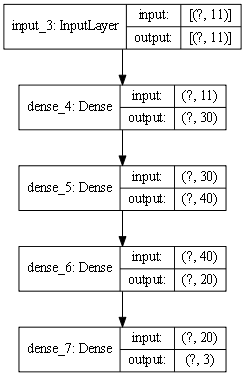

In [8]:
tf.keras.utils.plot_model(model,dpi=70,show_shapes=True)

## Multilabel Classification

Imagenary dataset will have 1,000 samples with 10 input features. The dataset will have three class label outputs for each sample and each class will have one or two values (0 or 1, e.g. present or not present).



In [9]:
# Define NN using Keras Functional API
# Input layer with suitable amount of nodes
# 1. hidden layer: 20
# 2. hidden layer: 20
# Output layer: number of nodes, activation function and loss

inputs = layers.Input(shape = (10,)) # with the presumption that no dummies etc. coding were needed for the features
hidden1 = layers.Dense(20)(inputs)
hidden2 = layers.Dense(20)(hidden1)
outputs = layers.Dense(3, activation = 'sigmoid')(hidden2) # one node per class

model = keras.Model(inputs = inputs, outputs = outputs, name = 'multiclasslabel_classification_model')


# Compile model with following options: 
# Define loss function and use adam optimization algorithm 

model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.01))

model.summary()

Model: "multiclasslabel_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 63        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


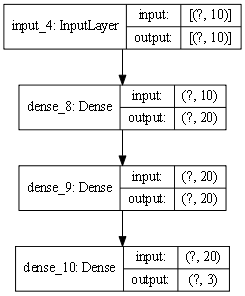

In [10]:
tf.keras.utils.plot_model(model,dpi=70,show_shapes=True)